<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_2/Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# %load https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/pre.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size




import warnings
warnings.filterwarnings('ignore')


'''
Let's plot these classifiers and see how well the decision boundaries are.
The following function is borrowed from the sklean guides. 
'''
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z,  levels=[-.5, 0, .5], linestyles=['--', '-', '--'])
    out = ax.contourf(xx, yy, Z,   **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max , h), np.arange(y_min, y_max , h) )
   
    return xx, yy

Kernels
====
Here we investigate how one can use a kernel to train a non_linear regressor or classifier. 
We generate a synthetic dataset here using sklearn and later transfor it. 

## Simple gaussian data for classification


In [0]:
## We use 'make_gaussian_quantiles'  to generate a synthetic dataset which we will use here. 
from sklearn.datasets import make_gaussian_quantiles, make_classification

### Data and Visulization 

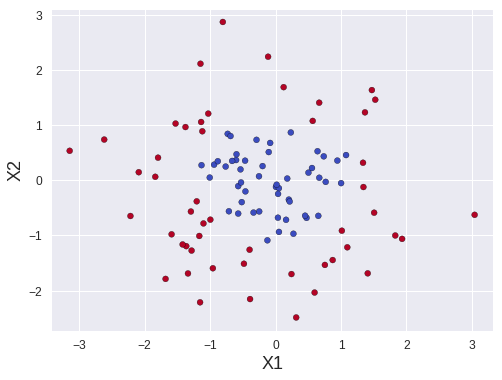

In [3]:
x_label = "X1"
y_label = "X2"


X, Y = make_gaussian_quantiles(mean=[0,0],n_features=2, n_classes=2, random_state=12)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, xlabel = x_label, ylabel=y_label)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=35, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()


In [0]:
'''
Now, let's imagine we are leaving in a 3D world and our data has another feature which we set to 0. 
We apply the following tranformation to change the last component. 
'''
def phi(X, ind=1):
  return np.array([X[:,0], X[:,1], ind*(X[:,0]**2 + X[:,1]**2) ] )


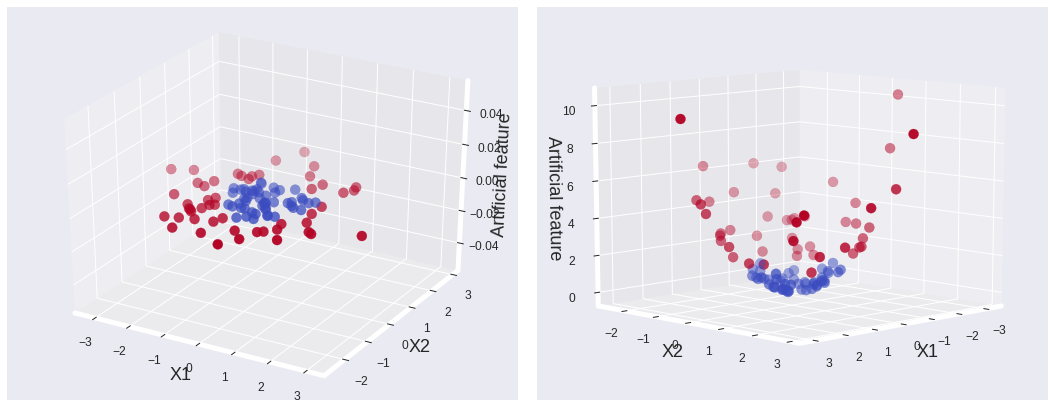

In [5]:
data_ext = phi(X,0)
data3D = phi(X)

##import the tool for making 3D plot
from mpl_toolkits.mplot3d import Axes3D

z_label = 'Artificial feature'

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(122, projection = '3d', xlabel = x_label, ylabel=y_label, zlabel=z_label)
ax1.scatter(data3D[0], data3D[1], data3D[2], c=Y, marker='o', s=100, cmap=plt.cm.coolwarm)
ax1.view_init(10, 45)

ax2 = fig.add_subplot(121, projection = '3d', xlabel = x_label, ylabel=y_label, zlabel=z_label)
ax2.scatter(data3D[0], data3D[1], data_ext[2], c=Y, marker='o', s=100, cmap=plt.cm.coolwarm)


plt.tight_layout()
plt.show()
plt.close()

### Kernelized Classification

In [0]:
from sklearn.svm import SVC

In [0]:
## Let's first train a dummy classifier. 
clf_0 = SVC(kernel='linear').fit(X,Y)



In [0]:
'''
Check the kernel and see how it changes the distance and features and
what role the following parameters play. 
'''

gamma = 2
alpha = 1
p = 2
def my_kernel(X, Y):
    """
    We create a custom kernel:

    k(X, Y) = (alpha+gamma*X.(Y.T) )^p 
                 
    """
    
    return ( alpha+gamma*np.dot(X, Y.T) )**p

  
### The follwoing function takes input fpr the kernel.   
def kernel_maker(a,g,p):
  
  def my_kernel(X, Y):
    """
    We create a custom kernel:

    k(X, Y) = (alpha+gamma*X.(Y.T) )^p 
                 
    """
    
    return ( a+g*np.dot(X, Y.T) )**p
  
  return my_kernel

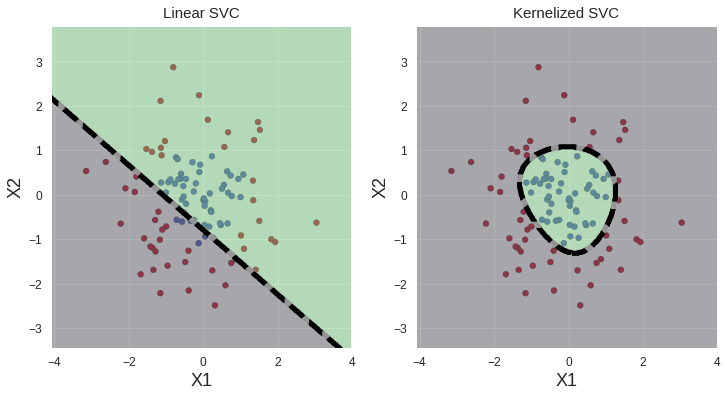

In [32]:
'''
Let's train the classifier with our kernel and 
see how it classifies the regions. 
'''
# X=X-2

alpha = 1  ## parameter for the linear kernel 
gamma = 2  ## parameter for the linear kernel : Weight of the distance
order = 3  ## parameter for the linear kernel : order of the polynomial

clf = SVC(kernel=kernel_maker(alpha,gamma,order) )
clf.fit(X,Y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig = plt.figure(figsize=(12,6))
ax_0 = fig.add_subplot(121, xlabel = x_label, ylabel=y_label, title = 'Linear SVC')
ax = fig.add_subplot(122, xlabel = x_label, ylabel=y_label, title = 'Kernelized SVC')

ax_0.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=35, edgecolor='k', cmap=plt.cm.coolwarm)
plot_contours(ax_0, clf_0, xx, yy, cmap=plt.cm.Accent, alpha=0.5)

ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=35, edgecolor='k', cmap=plt.cm.coolwarm)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.Accent, alpha=0.5)

plt.show()




## More complicated data
Here we transform our data from last section and make it more non_linear and repeat everything again.

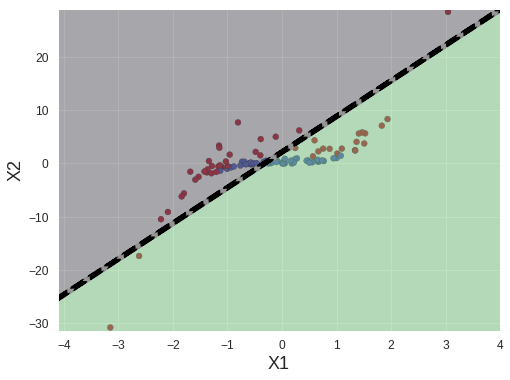

In [43]:
### We add a new column to the data whic is non-linear function of the first two columns.
Xp = np.c_[X , X[:,0]**3+X[:,1]**2 ][:,[0,2]]

## Let's first train a dummy classifier. 
clf_0 = SVC(kernel='linear').fit(Xp,Y)

### Here's hwo it tooks like. 

X0, X1 = Xp[:, 0], Xp[:, 1]
xx, yy = make_meshgrid(X0, X1, h=.02)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, xlabel = x_label, ylabel=y_label)

plt.scatter(Xp[:, 0], Xp[:, 1], marker='o', c=Y,
            s=35, edgecolor='k', cmap=plt.cm.coolwarm)
plot_contours(ax, clf_0, xx, yy, cmap=plt.cm.Accent, alpha=0.5)

plt.show()


In [39]:
## Now let's try the SVC with our kernel.
alpha = 1  ## parameter for the linear kernel 
gamma = 4  ## parameter for the linear kernel : Weight of the distance
order = 5  ## parameter for the linear kernel : order of the polynomial

clf = SVC(kernel=kernel_maker(1,1,3))
clf.fit(Xp,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function kernel_maker.<locals>.my_kernel at 0x7f247e29dea0>,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

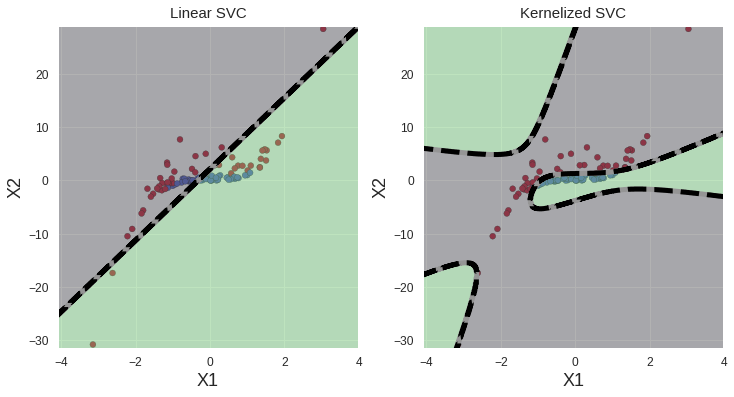

In [42]:
'''
Let's train the classifier with our kernel and 
see how it classifies the regions. 
'''
 
fig = plt.figure(figsize=(12,6))
ax_0 = fig.add_subplot(121, xlabel = x_label, ylabel=y_label, title = 'Linear SVC')
ax = fig.add_subplot(122, xlabel = x_label, ylabel=y_label, title = 'Kernelized SVC')

ax_0.scatter(Xp[:, 0], Xp[:, 1], marker='o', c=Y,
            s=35, edgecolor='k', cmap=plt.cm.coolwarm)
plot_contours(ax_0, clf_0, xx, yy, cmap=plt.cm.Accent, alpha=0.5)

ax.scatter(Xp[:, 0], Xp[:, 1], marker='o', c=Y,
            s=35, edgecolor='k', cmap=plt.cm.coolwarm)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.Accent, alpha=0.5)

plt.show()
